Tarea 4 - Modelamiento

Cargo: Ciencia de Datos: Luisa Velez 

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from scipy.stats import randint

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3308\1640700817.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Generamos nuestros vectores X & Y

In [2]:
datos = pd.read_csv("datos_limpios.csv")
datos

,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_cod_mcpio_ubicacion,cole_genero,cole_jornada,cole_naturaleza,cole_sede_principal,estu_genero,estu_fechanacimiento,...,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_global
0,0,0,1,5856,0,2,0,1,0,2003,...,3,2,3,2,5.5,0,1,0,1,252
1,0,0,1,5001,0,4,0,1,1,2002,...,3,1,-1,1,5.5,0,0,1,1,247
2,0,0,1,5001,1,5,0,1,1,2002,...,4,8,6,3,5.5,0,1,1,1,268
3,0,0,1,5001,0,5,0,1,0,2001,...,3,4,-1,4,3.5,0,1,1,1,197
4,0,0,0,5045,0,1,0,1,0,1999,...,3,1,4,1,5.5,0,0,0,1,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60018,0,0,1,5129,0,1,0,1,1,2002,...,4,3,3,2,5.5,1,1,1,1,208
60019,0,0,1,5031,0,4,0,1,1,2002,...,3,0,0,3,5.5,0,0,1,1,286
60020,0,0,1,5001,1,4,0,1,1,2003,...,4,0,2,3,5.5,0,1,1,1,237
60021,0,0,1,5154,0,3,0,1,1,1999,...,2,0,0,2,2.5,0,0,0,0,207


In [166]:
X = datos.iloc[:,1:21]
y = datos['punt_global']

In [167]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
1201/1201 [==============================] - 6s 4ms/step - loss: 5330.2441 - val_loss: 1308.7769
Epoch 2/200
1201/1201 [==============================] - 4s 3ms/step - loss: 1269.9188 - val_loss: 1211.3364
Epoch 3/200
1201/1201 [==============================] - 4s 3ms/step - loss: 1215.2408 - val_loss: 1211.7111
Epoch 4/200
1201/1201 [==============================] - 4s 4ms/step - loss: 1193.4768 - val_loss: 1181.4791
Epoch 5/200
1201/1201 [==============================] - 4s 3ms/step - loss: 1174.5791 - val_loss: 1140.1970
Epoch 6/200
1201/1201 [==============================] - 4s 3ms/step - loss: 1146.8329 - val_loss: 1111.2979
Epoch 7/200
1201/1201 [==============================] - 4s 4ms/step - loss: 1134.5626 - val_loss: 1115.2085
Epoch 8/200
1201/1201 [==============================] - 4s 3ms/step - loss: 1121.2477 - val_loss: 1115.9274
Epoch 9/200
1201/1201 [==============================] - 4s 3ms/step - loss: 1115.8687 - val_loss: 1151.6621
Epoch 10/200
1201/1

In [168]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

376/376 [==============================] - 1s 3ms/step
Error cuadrático medio (MSE): 1140.300941150125
Error absoluto medio (MAE): 26.957103653303637
Coeficiente de determinación (R^2): 0.6051296624271564


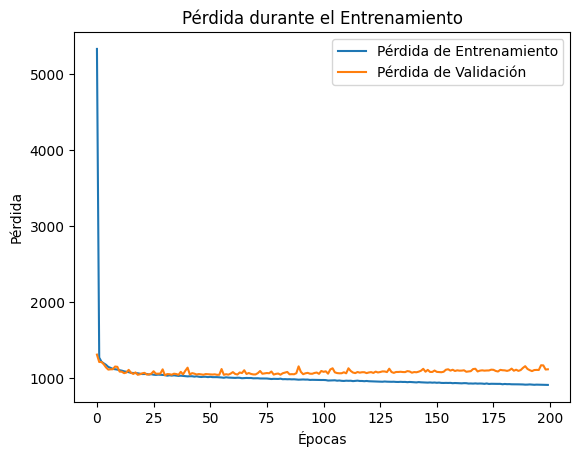

In [169]:
# Visualización de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

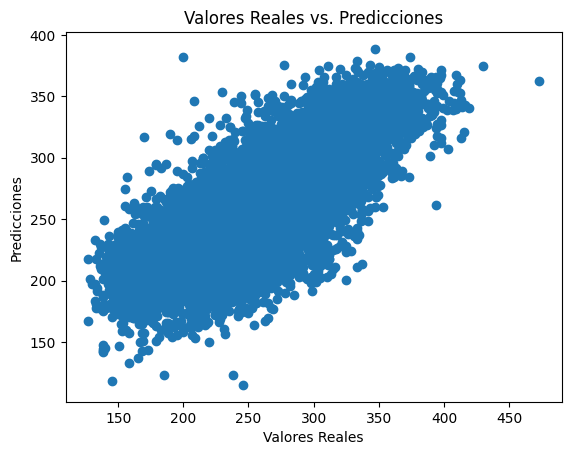

In [170]:
# Visualización de predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de red neuronal
mlp = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)

# Entrenar el modelo
mlp.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = mlp.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 1043.5069105333605
Error absoluto medio (MAE): 25.82994891545096
Coeficiente de determinación (R^2): 0.6386480874019946


In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y hacer predicciones en el conjunto de prueba
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)
print("Mejores hiperparámetros:", grid_search.best_params_)


Error cuadrático medio (MSE): 1010.4964398984156
Error absoluto medio (MAE): 25.480510296267077
Coeficiente de determinación (R^2): 0.6500791537220066
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [183]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(best_rf_model, 'modelo.joblib')

['modelo.joblib']

In [189]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimators = 500 
max_depth = 30
max_features = 40
# Cree el modelo con los parámetros definidos y entrénelo
rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
rf.fit(X_train, y_train)
# Realice predicciones de prueba
predictions = rf.predict(X_test)

r2 = r2_score(y_test, predictions)
r2

0.6283133830019079